In [53]:
import torch
from torch import nn
from torch import functional as F
import matplotlib.pyplot as plt

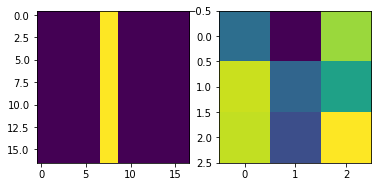

In [54]:
x = torch.zeros((17,17))
x[:,7:9] = 1
K = torch.rand((3,3))
plt.subplot(1,2,1)
plt.imshow(x)
plt.subplot(1,2,2)
plt.imshow(K)

In [55]:
class Module:

    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0

    def parameters(self):
        return []
class Corr2d(Module):

    def __init__(self, kernel_size, d = 0,  nonlin=True):
        self.K = torch.rand(kernel_size, kernel_size)
        self.b = torch.zeros(kernel_size, kernel_size)
        self.d = d
    def __call__(self, X):

        if self.d != 0:
          K_dilated = torch.zeros(2**(self.d + 2) -1, 2**(self.d + 2) - 1)
          K_dilated[2 ** (self.d) - 1::2 ** (self.d)   ,2**(self.d) - 1::2 ** (self.d)] = self.K
          self.K = K_dilated
        h, w = self.K.shape
        Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
        for i in range(Y.shape[0]):
            for j in range(Y.shape[1]):
                Y[i, j] = (X[i:i + h, j:j + w] * self.K).sum()

        return Y, self.K


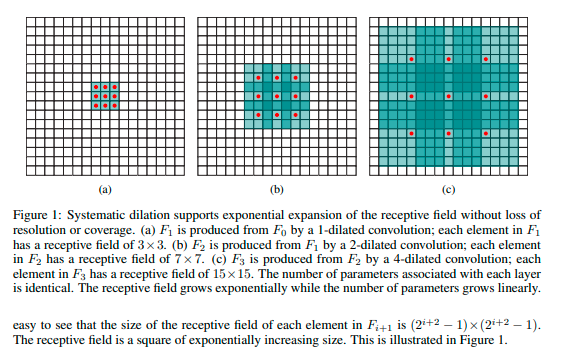

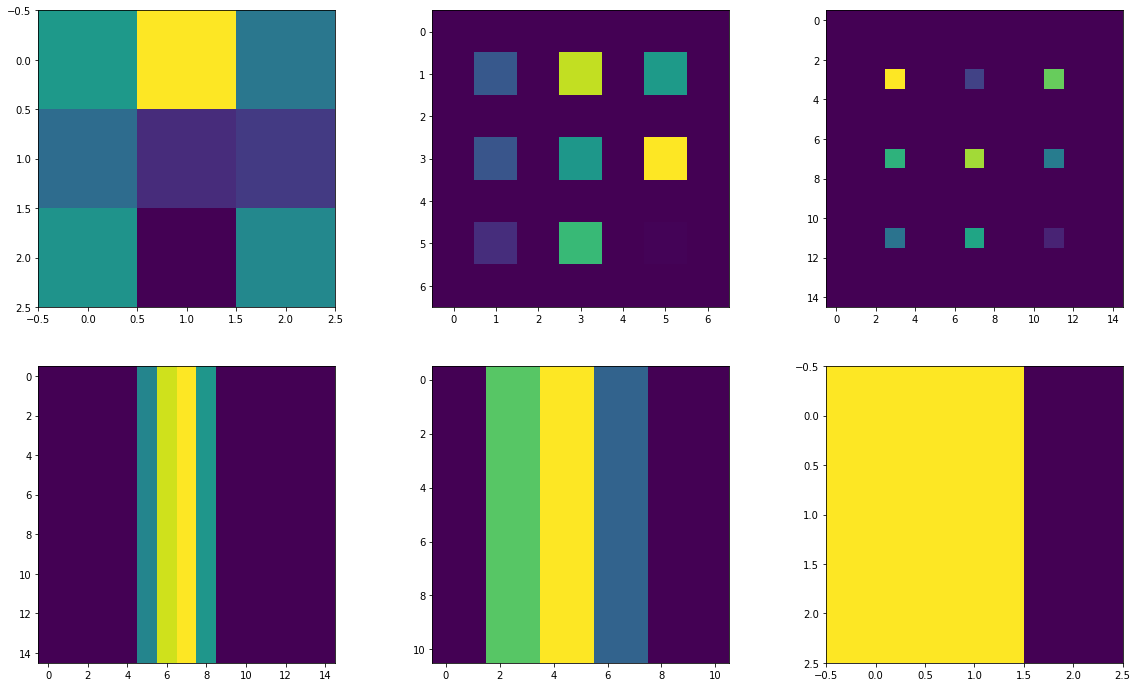

In [56]:
plt.figure(figsize = (20,12))

corr2d = Corr2d(3, 0)
Y0, k0 = corr2d(x)
plt.subplot(2,3,1)
plt.imshow(k0)
plt.subplot(2,3,4)
plt.imshow(Y0)

corr2d = Corr2d(3, 1)
Y1, k1 = corr2d(x)
plt.subplot(2,3,2)
plt.imshow(k1)
plt.subplot(2,3,5)
plt.imshow(Y1)

corr2d = Corr2d(3, 2)
Y2, k2 = corr2d(x)
plt.subplot(2,3,3)
plt.imshow(k2)
plt.subplot(2,3,6)
plt.imshow(Y2)